## L1: Web Scraping 8 Novels for characters

In [1]:
import pandas as pd
import time
import selenium

In [2]:
pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [3]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

#creating a driver
driver = webdriver.Chrome(ChromeDriverManager().install()) 

C:\Users\hi\AppData\Local\Temp/ipykernel_18208/1405505143.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


###### Extracting the URL and launching it with the webdriver

In [4]:
#going to the characters in the book page
char_url = "https://witcher.fandom.com/wiki/Category:Characters_in_the_stories"

In [5]:
#asking the driver to/direct us to that given url above
driver.get(char_url)

![]("C:/Users/hi/OneDrive/Documents/SEM 6/Project Proposals/DL Pres Pics/fandom page load.png")  


###### Extracting the categories with the help of class name; refering to the documentation given in Selenium as:

https://selenium-python.readthedocs.io/locating-elements.html

In [6]:
from selenium.webdriver.common.by import By
book_cat = driver.find_element(By.CLASS_NAME, "category-page__member-link")
#class="category-page__member-link" is the class name for the tag that shows the categories one by one
#now this will show just one element because the function is find_element

In [7]:
book_cat

<selenium.webdriver.remote.webelement.WebElement (session="19c2d5d91e47a543ee42719d3fabae7b", element="2fe67117-c272-4419-9e08-4f9a7dfb749d")>

In [8]:
#defining for all elements
book_cats = driver.find_elements(By.CLASS_NAME, "category-page__member-link")


In [9]:
book_cats

[<selenium.webdriver.remote.webelement.WebElement (session="19c2d5d91e47a543ee42719d3fabae7b", element="2fe67117-c272-4419-9e08-4f9a7dfb749d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="19c2d5d91e47a543ee42719d3fabae7b", element="5c8a8bf0-92d7-440e-8df3-ca7ab079fbdb")>,
 <selenium.webdriver.remote.webelement.WebElement (session="19c2d5d91e47a543ee42719d3fabae7b", element="e59d14f0-c11d-4e32-a3d4-07dceb713d67")>,
 <selenium.webdriver.remote.webelement.WebElement (session="19c2d5d91e47a543ee42719d3fabae7b", element="9638838c-a563-4762-b8b3-ad0db31e8672")>,
 <selenium.webdriver.remote.webelement.WebElement (session="19c2d5d91e47a543ee42719d3fabae7b", element="7884dfdd-90fc-4854-8afb-f96bdc35f3ba")>,
 <selenium.webdriver.remote.webelement.WebElement (session="19c2d5d91e47a543ee42719d3fabae7b", element="09008241-0411-49fa-8950-72f0d3a11fe4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="19c2d5d91e47a543ee42719d3fabae7b", element="79cad418-57a7-439b-b2b8-3f

In [10]:
book_cats[0].text

'Category:Baptism of Fire characters'

So the first book is indeed the same book that was observed on the website. I will now fetch all the href attributes from this whole HTML document concerning the first entry in book_cats.

###### Extracting Character Names in the selected book

In [11]:
book_cats[0].get_attribute('href')

'https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters'

In [12]:
driver.get(book_cats[0].get_attribute('href'))

So upon getting that URL of characters and running it with the help of the driver, the link is launched and it is observed that it contains all the characters in the first book.

###### Now I will extract the elements for all these character names

In [13]:
character_names = driver.find_elements(By.CLASS_NAME, "category-page__member-link")

In [14]:
character_names

[<selenium.webdriver.remote.webelement.WebElement (session="19c2d5d91e47a543ee42719d3fabae7b", element="85020d46-474f-4f25-87fb-31d9f03de9f7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="19c2d5d91e47a543ee42719d3fabae7b", element="4b6fa508-709a-4b0d-a9f6-40f73d8c71fb")>,
 <selenium.webdriver.remote.webelement.WebElement (session="19c2d5d91e47a543ee42719d3fabae7b", element="12d4df35-bb17-4056-bb67-adca1b9f0eac")>,
 <selenium.webdriver.remote.webelement.WebElement (session="19c2d5d91e47a543ee42719d3fabae7b", element="7e064a72-7d56-4391-913b-aff2bd476870")>,
 <selenium.webdriver.remote.webelement.WebElement (session="19c2d5d91e47a543ee42719d3fabae7b", element="73214a52-5915-4793-8e90-e63f2f2d3f86")>,
 <selenium.webdriver.remote.webelement.WebElement (session="19c2d5d91e47a543ee42719d3fabae7b", element="35b19181-abbf-4d78-8f1e-8fd3c12f2895")>,
 <selenium.webdriver.remote.webelement.WebElement (session="19c2d5d91e47a543ee42719d3fabae7b", element="c51731e0-b1a2-4f2e-9cde-16

In [15]:
#now after capturing all elements with the class name "category-page__member-link"
#let me see what the first name is and if it matches with what is given on the webpage

In [16]:
character_names[0].text

'Adalia'

##### It does :)

Now in order to extract all the characters for further relationship extraction, I will build a for loop that will capture all character info and then transform it into a usable CSV file.

## Instantiating the scraping of all the books present in the categories, scraping all of the URLs, titles, and characters with character names 

## Transforming that instance into a CSV file

In [17]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By


#book_cats = WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.CLASS_NAME, "category-page__member-link")))
book_cats = WebDriverWait(driver, 30).until(EC.presence_of_all_elements_located((By.CLASS_NAME, "category-page__member-link")))
#adding a waiting time for the element to still be available in the DOM
#it waits for 10s

books = []
for category in book_cats:
    book_url = category.get_attribute('href')
    book_name = category.text
    books.append({'book_name': book_name, "url": book_url})


In [18]:
books

[{'book_name': 'Adalia', 'url': 'https://witcher.fandom.com/wiki/Adalia'},
 {'book_name': 'Adela', 'url': 'https://witcher.fandom.com/wiki/Adela'},
 {'book_name': 'Aen Saevherne',
  'url': 'https://witcher.fandom.com/wiki/Aen_Saevherne'},
 {'book_name': 'Aevenien', 'url': 'https://witcher.fandom.com/wiki/Aevenien'},
 {'book_name': 'Aglaïs', 'url': 'https://witcher.fandom.com/wiki/Agla%C3%AFs'},
 {'book_name': 'Albrich', 'url': 'https://witcher.fandom.com/wiki/Albrich'},
 {'book_name': 'Amavet', 'url': 'https://witcher.fandom.com/wiki/Amavet'},
 {'book_name': 'Angus Bri Cri',
  'url': 'https://witcher.fandom.com/wiki/Angus_Bri_Cri'},
 {'book_name': 'Anna Kameny',
  'url': 'https://witcher.fandom.com/wiki/Anna_Kameny'},
 {'book_name': 'Anzelm Aubry',
  'url': 'https://witcher.fandom.com/wiki/Anzelm_Aubry'},
 {'book_name': 'Artaud Terranova',
  'url': 'https://witcher.fandom.com/wiki/Artaud_Terranova'},
 {'book_name': 'Asse', 'url': 'https://witcher.fandom.com/wiki/Asse'},
 {'book_name': 

characters = []

for book in books:
    #go to book page
    driver.get(book['url'])
    #character_names = driver.find_elements(By.CLASS_NAME, "category-page__member-link")
    
    for name in character_names:
        characters.append({'book':book['book_name'], 'character':name.text})

In [20]:
characters = []

for book in books:
    #go to book page
    driver.get(book['url'])
    character_names = [name.text for name in driver.find_elements(By.CLASS_NAME, "category-page__member-link")]
    
    for name in character_names:
        characters.append({'book':book['book_name'], 'character':name})

So all of that data has been scraped succesfully. Now, I need to just transform this into a pandas dataframe like so:

In [ ]:
pd.DataFrame(characters)

In [ ]:
characterscrap = pd.DataFrame(characters)

## L2: Generating the CSV file

In [26]:
#characterscrap.to_csv('characters.csv', index=False)

<function matplotlib.pyplot.show(close=None, block=None)>

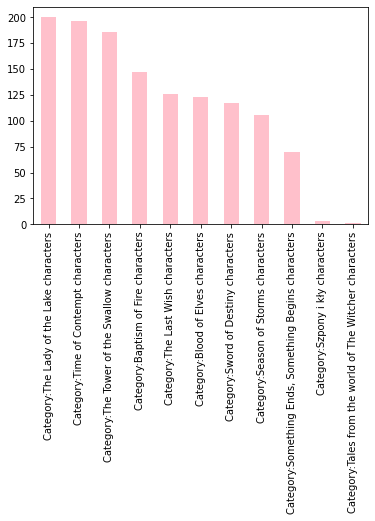

In [24]:
#creating a barplot to see which book has the most number of characters
#this will be achieved with the help of value_counts
import matplotlib.pyplot as plt
characters = pd.read_csv('characters.csv')
characters['book'].value_counts().plot(kind='bar', color='pink')

plt.show

So the book The Lady of the Lake has the most number of characters, hitting a number of 200!

##### I now have a proper dataset of all the characters. This dataset can now be used for relationship extraction too.